# Credit Risk Prediction Model

By Jonathan Stanley, VIX Rakamin Academy Data Science @ ID/X Partners

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from imblearn.ensemble import BalanceCascade
from imblearn.over_sampling import RandomOverSampler
import pickle

# Standard Library Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



## A) Business Understanding

### Overview
Applying for loan to a lending company is normally a choice for most people who are in need of cash for urgent uses. Whether or not it is suitable to give a certain inidividual a loan is a problem that every lending company needs to consider. It is much more efficient to filter the selected loan receiver using a model based on the past dataset of the loan receivers.

For a lending company, they evaluate the status of every borrower using credit risk. **Credit risk** is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations.

To put it in a simple way, there is a risk that the borrower may not repay the loan which will result in a loss for the company.

### Objective
Create a machine learning model to label whether or not an individual is suitable to apply for loan in the company by analyzing informations from previous loan receivers to minimize failure of loan repayment.



## B) Data Understanding

### Dataset Information
The dataset used in this project is a loan record dataset from the lending company based from previous users and the variables used to determine their loan credit status. The target variable in this dataset is loan_status. 


In [157]:
# importing and previewing the dataset
loan_data = pd.read_csv('loan_data_2007_2014.csv', low_memory = False,index_col = 'Unnamed: 0')
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(466285, 74)

The dataset consists of 74 Columns with 466285 Rows

**Data Types**

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
# Statistical Summary for numeric columns
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


In [6]:
loan_data.describe(include='object').transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


### Exploratory Data Analysis (EDA)

**Loan Status (Target Variable)** 

Loan Status refers to the current status of the loan

In [7]:
print(loan_data['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


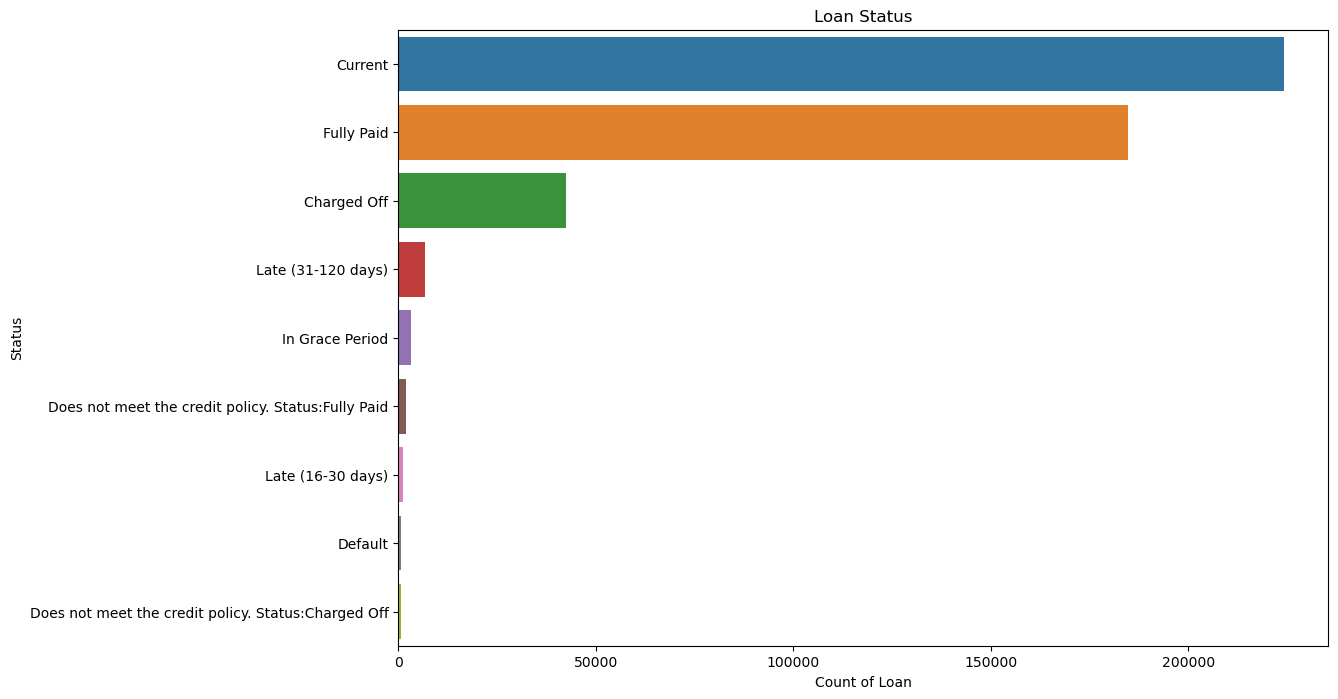

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


In [8]:
# Bar Plot 
plt.figure(figsize=(12,8))
sns.countplot(y='loan_status', data=loan_data, order = loan_data['loan_status'].value_counts().index)

# Add the aesthetics
plt.title('Loan Status')
plt.xlabel('Count of Loan')
plt.ylabel('Status')

# Show the plot
plt.show()
print(loan_data['loan_status'].value_counts())

In this dataset, there are 9 different values regarding the loan_status column. The next step will be dividing the loan status between the good loans and bad loans. In this scenario, the "Current" and "In Grace Period" values will be excluded due to those are on going loans. Good loans will include "Fully Paid" values, while bad loans will include "Charged Off", "Late", "Does not meet the credit policy", and "Default" values.

In [9]:
good_loan = ["Current","In Grace Period","Fully Paid"]

bad_loan = ["Charged Off",
            "Default",
            "Late (31-120 days)",
            "Late(16 - 30 days )",
            "Does not meet the credit policy. Status:Fully Paid",
            "Does not meet the credit policy. Status:Charged Off"]

# function to categorize loan status
def loan_status_category(value):
    if value in good_loan:
        return 1
    elif value in bad_loan:
        return 0
    else :
        return 2 
# 0 = bad loan , 1 = good loan, 2 = unnecessary status

loan_data ["loan_category"] = loan_data["loan_status"].apply(loan_status_category)



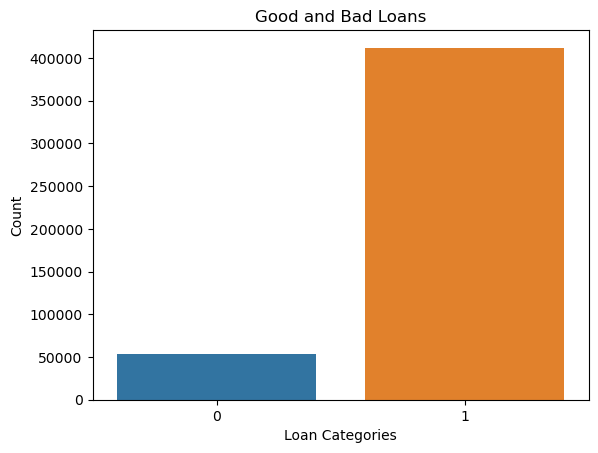

1    412111
0     52956
Name: loan_category, dtype: int64


In [10]:
good_bad_loan = loan_data[loan_data["loan_category"] < 2]

sns.countplot(data = good_bad_loan, x = "loan_category")
# Add the aesthetics

plt.title('Good and Bad Loans')
plt.xlabel('Loan Categories')
plt.ylabel('Count')

plt.show()


print(good_bad_loan["loan_category"].value_counts())

In [14]:
loan_data.drop('loan_status', axis=1, inplace=True)

## C) Data Preparation

### Data Preprocessing

**Converting the type of columns which contains dates to datetime**

In [15]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['last_pymnt_d_date'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')
loan_data['next_pymnt_d_date'] = pd.to_datetime(loan_data['next_pymnt_d'], format='%b-%y')
loan_data['last_credit_pull_d_date'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y')

loan_data.drop(['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

date_columns = ['earliest_cr_line_date','issue_d_date','last_pymnt_d_date','next_pymnt_d_date','last_credit_pull_d_date']

In [16]:
loan_data[date_columns].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
earliest_cr_line_date,466256,1997-12-16 11:57:43.058920192,1969-01-01,1994-03-01,1999-03-01,2002-09-01,2068-12-01
issue_d_date,466285,2013-08-23 15:33:29.494623232,2007-06-01,2013-03-01,2014-01-01,2014-07-01,2014-12-01
last_pymnt_d_date,465909,2015-04-23 05:05:48.379619584,2007-12-01,2015-01-01,2015-12-01,2016-01-01,2016-01-01
next_pymnt_d_date,239071,2016-01-09 10:57:21.631983872,2007-12-01,2016-02-01,2016-02-01,2016-02-01,2016-03-01
last_credit_pull_d_date,466243,2015-08-30 16:56:26.436685824,2007-05-01,2015-11-01,2016-01-01,2016-01-01,2016-01-01


The dataset contains data from 2007 to 2016, to gain a better result from the prediction of the data, the date used to be the maximum limit of the periode of the data will be 31 December 2016.

In [17]:
end_of_period = pd.to_datetime('2016-12-31')

### Feature Engineering

**Credit History Length** 

The **'credit_history_length'** column will be created which contains information about how long the borrower had credit history (result format in days)

In [18]:
loan_data['credit_history_length'] = (end_of_period - loan_data['earliest_cr_line_date']).dt.days.astype(float)

In [19]:
loan_data['credit_history_length'].head()

0    11687.0
1     6484.0
2     5539.0
3     7639.0
4     7670.0
Name: credit_history_length, dtype: float64

In [20]:
loan_data['credit_history_length'].describe()

count    466256.000000
mean       6954.501585
std        2860.358510
min      -18963.000000
25%        5235.000000
50%        6515.000000
75%        8341.000000
max       17531.000000
Name: credit_history_length, dtype: float64

In [21]:
#Rows where credit_history_length have negative values
selected_columns = ['credit_history_length', 'earliest_cr_line_date']
rows_with_negative_values = loan_data[loan_data['credit_history_length'] < 0]
rows_with_negative_values[selected_columns]

,credit_history_length,earliest_cr_line_date
1580,-16680.0,2062-09-01
1770,-18872.0,2068-09-01
2799,-17411.0,2064-09-01
3282,-18506.0,2067-09-01
3359,-17564.0,2065-02-01
...,...,...
464003,-18628.0,2068-01-01
464260,-18079.0,2066-07-01
465100,-18536.0,2067-10-01
465500,-18506.0,2067-09-01


There are several rows where the earliest credit line date is in the future based from the referenced date (2016-12-31) which resulted in a negative value in the credit_history_length. These rows will not be used.

In [22]:
loan_data = loan_data[loan_data['credit_history_length'] >= 0]

**Days Since Last Payment**

Contains information regarding the number of days elapsed since the last payment date to the end of period observed

In [23]:
loan_data['days_since_last_payment'] = (end_of_period - loan_data['last_pymnt_d_date']).dt.days.astype(float)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\2986225797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['days_since_last_payment'] = (end_of_period - loan_data['last_pymnt_d_date']).dt.days.astype(float)


In [25]:
loan_data['days_since_last_payment'].head()

0     730.0
1    1370.0
2     944.0
3     730.0
4     365.0
Name: days_since_last_payment, dtype: float64

In [24]:
loan_data['days_since_last_payment'].describe()

count    464712.000000
mean        617.778149
std         389.722988
min         365.000000
25%         365.000000
50%         396.000000
75%         730.000000
max        3318.000000
Name: days_since_last_payment, dtype: float64

**Days Until Next Payment**

Contains information regarding the number of days days from  the date until next payment to the end of period observed (result format in days)

In [26]:
# Calculate time_until_next_payment by subtracting the end of the period from next_pymnt_d_date
loan_data['days_until_next_payment'] = (end_of_period - loan_data['next_pymnt_d_date']).dt.days.astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\1456757526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['days_until_next_payment'] = (end_of_period - loan_data['next_pymnt_d_date']).dt.days.astype(float)


In [27]:
loan_data['days_until_next_payment'].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    334.0
Name: days_until_next_payment, dtype: float64

In [28]:
loan_data['days_until_next_payment'].describe()

count    238361.000000
mean        356.284325
std         183.592511
min         305.000000
25%         334.000000
50%         334.000000
75%         334.000000
max        3318.000000
Name: days_until_next_payment, dtype: float64

**Days Since Last Credit Pull**

Contains information regarding the number of days since the last credit pull to the end of period observed (result format in days)

In [29]:
# Calculate time_since_last_credit_pull by subtracting last_credit_pull_d_date from the end of the period
loan_data['days_since_last_credit_pull'] = (end_of_period - loan_data['last_credit_pull_d_date']).dt.days.astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\617260723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['days_since_last_credit_pull'] = (end_of_period - loan_data['last_credit_pull_d_date']).dt.days.astype(float)


In [30]:
loan_data['days_since_last_credit_pull'].head()

0     365.0
1    1217.0
2     365.0
3     730.0
4     365.0
Name: days_since_last_credit_pull, dtype: float64

In [31]:
loan_data['days_since_last_credit_pull'].describe()

count    465047.000000
mean        488.188353
std         292.893149
min         365.000000
25%         365.000000
50%         365.000000
75%         426.000000
max        3532.000000
Name: days_since_last_credit_pull, dtype: float64

In [32]:
loan_data[date_columns]

,earliest_cr_line_date,issue_d_date,last_pymnt_d_date,next_pymnt_d_date,last_credit_pull_d_date
0,1985-01-01,2011-12-01,2015-01-01,NaT,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,NaT,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,NaT,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,NaT,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
466280,2003-04-01,2014-01-01,2016-01-01,2016-02-01,2016-01-01
466281,1997-06-01,2014-01-01,2014-12-01,NaT,2016-01-01
466282,2001-12-01,2014-01-01,2016-01-01,2016-02-01,2015-12-01
466283,2003-02-01,2014-01-01,2014-12-01,NaT,2015-04-01


In [33]:
# Dropping The Date Columns
loan_data.drop(columns=date_columns, axis=1, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\2571885318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.drop(columns=date_columns, axis=1, inplace=True)


**Correlation Between Variables**

In [36]:
corr_matrix = loan_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\4215706819.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [37]:
to_drop_hicorr

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'days_until_next_payment',
 'days_since_last_credit_pull']

<AxesSubplot:>

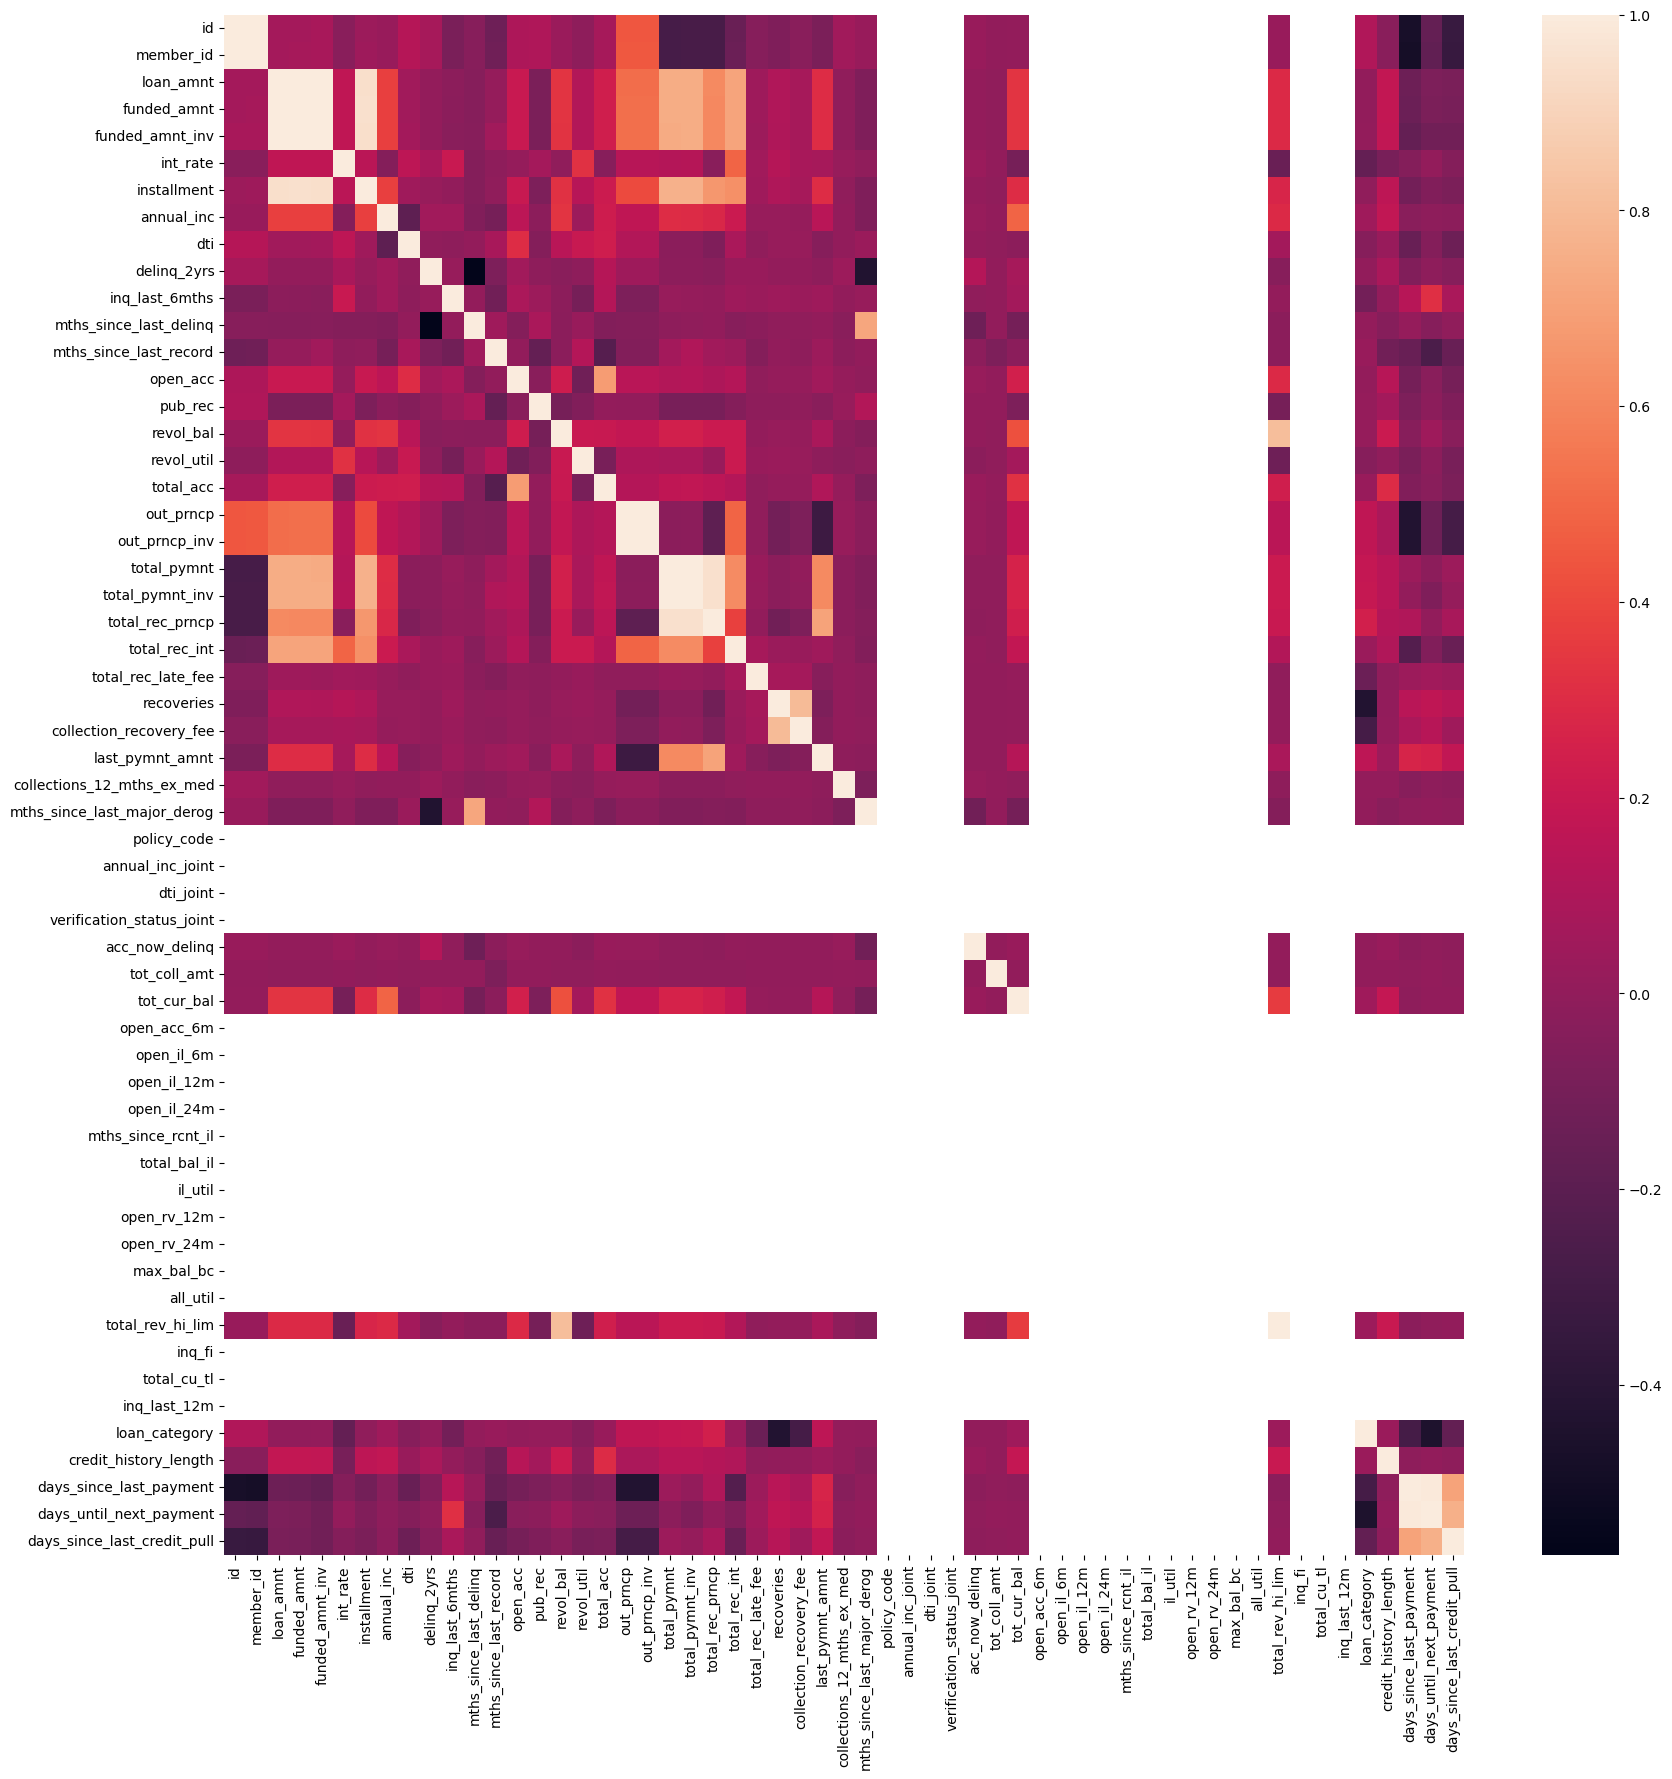

In [38]:
correlation_matrix = loan_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr())

In [49]:
#Variables with high redundancy 
redundancy_threshold = 0.8
high_redundancy_columns = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > redundancy_threshold].tolist()
    if col in correlated_cols:
        correlated_cols.remove(col)  # Remove the column itself from the correlated list
    high_redundancy_columns.update(correlated_cols)

In [50]:
high_redundancy_columns

{'collection_recovery_fee',
 'days_since_last_payment',
 'days_until_next_payment',
 'funded_amnt',
 'funded_amnt_inv',
 'id',
 'installment',
 'loan_amnt',
 'member_id',
 'out_prncp',
 'out_prncp_inv',
 'recoveries',
 'revol_bal',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [51]:
corr_drop = list(high_redundancy_columns)

In [52]:
loan_data.drop(corr_drop, axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\2880215335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.drop(corr_drop, axis=1, inplace=True)


### Data Cleaning
**Handling Missing Values and Irrelevant Features**

In [53]:
#Columns with missing values
missing_values = loan_data.isna().sum()
missing_cols = missing_values[missing_values > 0]
print("Columns with missing values and its amount :")
print(missing_cols)

Columns with missing values and its amount :
emp_title                       27105
emp_length                      20578
desc                           339417
title                              20
mths_since_last_delinq         249798
mths_since_last_record         402738
revol_util                        311
collections_12_mths_ex_med        116
mths_since_last_major_derog    366456
annual_inc_joint               465087
dti_joint                      465087
verification_status_joint      465087
tot_coll_amt                    70115
tot_cur_bal                     70115
open_acc_6m                    465087
open_il_6m                     465087
open_il_12m                    465087
open_il_24m                    465087
mths_since_rcnt_il             465087
total_bal_il                   465087
il_util                        465087
open_rv_12m                    465087
open_rv_24m                    465087
max_bal_bc                     465087
all_util                       465087
inq_f

In [54]:
#Columns where all of the values are missing
all_missing_cols = list(loan_data.columns[loan_data.isnull().all()])
print("List Of Columns where all values are missing: ")
print(all_missing_cols)

List Of Columns where all values are missing: 
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [56]:
loan_data.drop(all_missing_cols,axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\172415432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.drop(all_missing_cols,axis=1, inplace=True)


**Checking for Missing Values**

In [57]:
# Information regarding columns and their values
data_prep = pd.DataFrame()
data_prep.index = loan_data.columns
data_prep["unique_value"] = loan_data.nunique()
data_prep["missing_rate"] = loan_data.isna().mean()
data_prep["dtype"] = loan_data.dtypes
data_prep

,unique_value,missing_rate,dtype
term,2,0.000000,object
int_rate,506,0.000000,float64
grade,7,0.000000,object
sub_grade,35,0.000000,object
emp_title,205209,0.058279,object
emp_length,11,0.044245,object
home_ownership,6,0.000000,object
annual_inc,31785,0.000000,float64
verification_status,3,0.000000,object
pymnt_plan,2,0.000000,object


In [58]:
# Filter rows where missing_rate is not 0.0
filtered_data = data_prep[data_prep["missing_rate"] != 0.0]

# Display the filtered data
print(filtered_data)


                             unique_value  missing_rate    dtype
emp_title                          205209      0.058279   object
emp_length                             11      0.044245   object
desc                               124132      0.729792   object
title                               62966      0.000043   object
mths_since_last_delinq                145      0.537100  float64
mths_since_last_record                123      0.865941  float64
revol_util                           1268      0.000669  float64
collections_12_mths_ex_med              9      0.000249  float64
mths_since_last_major_derog           162      0.787930  float64
tot_coll_amt                         6303      0.150757  float64
tot_cur_bal                        220334      0.150757  float64
days_since_last_credit_pull           103      0.000086  float64


In [59]:
# Columns with more than 70% missing values
missing_columns = list(data_prep[data_prep["missing_rate"] > 0.7].index)
print("Columns with more than 70% missing values :")
print(missing_columns)

Columns with more than 70% missing values :
['desc', 'mths_since_last_record', 'mths_since_last_major_derog']


In [60]:
# Columns where all their values are unique
unique_columns = list(data_prep[data_prep["unique_value"] == loan_data.shape[0]].index)
print("Columns where all their values are unique :")
print(unique_columns)

Columns where all their values are unique :
['url']


In [61]:
# Categorical Columns with unique values 
category_data = data_prep[data_prep["dtype"] == "object"]
unique_category_columns = list(category_data[category_data["unique_value"] > 10000].index)
print("Categorical Columns with unique values :")
print(unique_category_columns)

Categorical Columns with unique values :
['emp_title', 'url', 'desc', 'title']


In [62]:
# Columns with only one specific value
single_value_columns = list(data_prep[data_prep["unique_value"] == 1].index)
print(single_value_columns)

['policy_code', 'application_type']


In [63]:
# Columns with irrelevant features
irrelevant_columns = ["zip_code","emp_title","sub_grade"]
#There will be several columns which is irrelevant in building a model

In [64]:
# Dropping all columns with missing values and irrelevant features
dropped_columns = missing_columns + unique_columns + unique_category_columns + single_value_columns + irrelevant_columns
print(dropped_columns)


['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'url', 'emp_title', 'url', 'desc', 'title', 'policy_code', 'application_type', 'zip_code', 'emp_title', 'sub_grade']


In [65]:
# Naming the cleaned dataset as clean_data
clean_data = loan_data.copy()
clean_data.drop(columns = dropped_columns,inplace = True,axis = 1)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465087 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         465087 non-null  object 
 1   int_rate                     465087 non-null  float64
 2   grade                        465087 non-null  object 
 3   emp_length                   444509 non-null  object 
 4   home_ownership               465087 non-null  object 
 5   annual_inc                   465087 non-null  float64
 6   verification_status          465087 non-null  object 
 7   pymnt_plan                   465087 non-null  object 
 8   purpose                      465087 non-null  object 
 9   addr_state                   465087 non-null  object 
 10  dti                          465087 non-null  float64
 11  delinq_2yrs                  465087 non-null  float64
 12  inq_last_6mths               465087 non-null  float64
 13 

### Optimizing dataset for modelling

The Dataset used will divided into two types, categorical , and numerical columns. The remaining missing value in each columns will be handled separately. 

In [66]:
# Separating numerical and object categories of the new dataset
num_cols = clean_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = clean_data.select_dtypes(include=['object']).columns

**Categorical Columns**

In [67]:
cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

The rest of the missing categorical value will be replaced with the mode statistical feature

In [68]:
for col in cat_cols:
    # Calculate the mode of the column
    mode = clean_data[col].mode()[0]
    # Replace all missing values in the column with the mode
    clean_data[col].fillna(mode, inplace=True)


In [69]:
categorical_data = clean_data.loc[:,cat_cols]

In [70]:
# Checking if the mising values are fully handled
categorical_data.isna().sum()

term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
dtype: int64

**Numerical Columns**

In [71]:
num_cols

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'loan_category', 'credit_history_length',
       'days_since_last_credit_pull'],
      dtype='object')

In [72]:
clean_data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
int_rate,465087.0,13.831620,4.357853,5.42,10.99,13.66,16.490,26.06
annual_inc,465087.0,73263.724465,54935.636731,1896.00,45000.00,63000.00,88824.000,7500000.00
dti,465087.0,17.218658,7.850234,0.00,11.36,16.87,22.780,39.99
delinq_2yrs,465087.0,0.284375,0.796831,0.00,0.00,0.00,0.000,29.00
inq_last_6mths,465087.0,0.804740,1.091565,0.00,0.00,0.00,1.000,33.00
mths_since_last_delinq,215289.0,34.107600,21.776187,0.00,16.00,31.00,49.000,188.00
open_acc,465087.0,11.185974,4.987697,0.00,8.00,10.00,14.000,84.00
pub_rec,465087.0,0.160112,0.509220,0.00,0.00,0.00,0.000,63.00
revol_util,464776.0,56.187750,23.730854,0.00,39.20,57.60,74.700,892.30
total_acc,465087.0,25.056697,11.599562,1.00,17.00,23.00,32.000,156.00


The missing values from numerical columns will be replaced with the statistical feature median due to most of them being skewed.

In [73]:
for col in num_cols:
    # Calculate the median of the column
    median = clean_data[col].median()
    # Replace all missing values in the column with the mode
    clean_data[col].fillna(median, inplace=True)


In [74]:
missing_num_cols = clean_data[num_cols].isna().sum()
missing_num_cols

int_rate                       0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
loan_category                  0
credit_history_length          0
days_since_last_credit_pull    0
dtype: int64

### Optimizing dataset for modelling

The target label for the model will be based on the "loan_status" columns which we have already classified into 1 : good loan,
0 : bad loan, and 2 : unnecessary status.

In order to get a better and precise model, we will only use the data category with the value 0 and 1.

In [75]:
clean_data["loan_category"].unique()

array([1, 0, 2], dtype=int64)

In [76]:
# The new optimized dataset will be labeled as clean_data_2
clean_data_2 = clean_data[clean_data["loan_category"]<2]

print(clean_data_2.info())
#checking if dataset only contains loan_category 0 or 1
print(clean_data_2["loan_category"].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463874 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   term                         463874 non-null  object 
 1   int_rate                     463874 non-null  float64
 2   grade                        463874 non-null  object 
 3   emp_length                   463874 non-null  object 
 4   home_ownership               463874 non-null  object 
 5   annual_inc                   463874 non-null  float64
 6   verification_status          463874 non-null  object 
 7   pymnt_plan                   463874 non-null  object 
 8   purpose                      463874 non-null  object 
 9   addr_state                   463874 non-null  object 
 10  dti                          463874 non-null  float64
 11  delinq_2yrs                  463874 non-null  float64
 12  inq_last_6mths               463874 non-null  float64
 13 

The dataset that will be used for the model after cleaning consists of 44 columns, with 465067 rows.

## D) Data Modeling

To predict whether or not a loan request should be accepted or declined, a Random ForestClassifier model is going to be used. the label variable loan_category consists of two value which is 1 for good loan, and 0 for bad loan. The other predictor variables will be used to train the model regarding predicting whether a loan is good or bad based on the data provided.

In [77]:
#Separating label columns and predictor columns
label = clean_data_2["loan_category"]
predictor = clean_data_2.drop("loan_category",axis=1)

In [78]:
#predictor numerical features
pred_num = predictor.select_dtypes(include=["float64","int64"])
# predictor categorical features
pred_cat= predictor.select_dtypes(include="object")
pred_cat.describe().T

,count,unique,top,freq
term,463874,2,36 months,336292
grade,463874,7,B,136293
emp_length,463874,11,10+ years,169843
home_ownership,463874,6,MORTGAGE,234598
verification_status,463874,3,Verified,166955
pymnt_plan,463874,2,n,463866
purpose,463874,14,debt_consolidation,272821
addr_state,463874,50,CA,71077
initial_list_status,463874,2,f,301576


In [79]:
#OneHotEncode
pred_cat_s = pd.get_dummies(pred_cat)
pred_cat_s

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
pred_cat_s.reset_index(drop=True, inplace=True)

In [81]:
pred_num

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,credit_history_length,days_since_last_credit_pull
0,10.65,24000.0,27.65,0.0,1.0,31.0,3.0,0.0,83.7,9.0,861.07,0.00,171.62,0.0,0.0,0.0,81559.5,11687.0,365.0
1,15.27,30000.0,1.00,0.0,5.0,31.0,3.0,0.0,9.4,4.0,435.17,0.00,119.66,0.0,0.0,0.0,81559.5,6484.0,1217.0
2,15.96,12252.0,8.72,0.0,2.0,31.0,2.0,0.0,98.5,10.0,603.65,0.00,649.91,0.0,0.0,0.0,81559.5,5539.0,365.0
3,13.49,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,37.0,2209.33,16.97,357.48,0.0,0.0,0.0,81559.5,7639.0,730.0
4,12.69,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,38.0,1009.07,0.00,67.79,0.0,0.0,0.0,81559.5,7670.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,110000.0,19.85,0.0,2.0,31.0,18.0,0.0,77.6,36.0,4557.36,0.00,432.64,0.0,0.0,0.0,294998.0,5023.0,365.0
466281,19.97,78000.0,18.45,0.0,5.0,31.0,18.0,1.0,46.3,30.0,2840.88,0.00,17.50,0.0,0.0,0.0,221830.0,7153.0,365.0
466282,16.99,46000.0,25.65,0.0,2.0,65.0,18.0,0.0,51.1,43.0,6072.29,0.00,514.34,0.0,0.0,0.0,73598.0,5509.0,396.0
466283,7.90,83000.0,5.39,3.0,1.0,13.0,21.0,0.0,21.5,27.0,126.58,0.00,1500.68,0.0,0.0,0.0,591610.0,5082.0,640.0


In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
pred_num_s = pd.DataFrame(ss.fit_transform(pred_num), columns=pred_num.columns)

In [83]:
pred_num_s.reset_index(drop=True, inplace=True)

In [84]:
pred_num_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,credit_history_length,days_since_last_credit_pull
0,-0.728985,-0.896305,1.329448,-0.356722,0.179158,-0.096858,-1.641214,-0.314183,1.159979,-1.384204,-0.695279,-0.122798,-0.532347,-0.083572,-0.058186,-0.012019,-0.343147,1.808778,-0.421205
1,0.331431,-0.787145,-2.065827,-0.356722,3.844245,-0.096858,-1.641214,-0.314183,-1.971645,-1.815288,-0.866952,-0.122798,-0.541691,-0.083572,-0.058186,-0.012019,-0.343147,-0.206467,2.484684
2,0.489805,-1.110039,-1.082280,-0.356722,1.095430,-0.096858,-1.841739,-0.314183,1.783775,-1.297987,-0.799040,-0.122798,-0.446336,-0.083572,-0.058186,-0.012019,-0.343147,-0.572488,-0.421205
3,-0.077127,-0.437834,0.354819,-0.356722,0.179158,0.171700,-0.237543,-0.314183,-1.482724,1.029870,-0.151819,3.131798,-0.498924,-0.083572,-0.058186,-0.012019,-0.343147,0.240892,0.823689
4,-0.260749,0.122518,0.092370,-0.356722,-0.737114,0.373118,0.765080,-0.314183,-0.096043,1.116086,-0.635623,-0.122798,-0.551019,-0.083572,-0.058186,-0.012019,-0.343147,0.252899,-0.421205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463869,0.147809,0.668316,0.335709,-0.356722,1.095430,-0.096858,1.366654,-0.314183,0.902874,0.943653,0.794630,-0.122798,-0.485408,-0.083572,-0.058186,-0.012019,1.164347,-0.772347,-0.421205
463870,1.410210,0.086131,0.157346,-0.356722,3.844245,-0.096858,1.366654,1.649562,-0.416370,0.426351,0.102748,-0.122798,-0.560063,-0.083572,-0.058186,-0.012019,0.647569,0.052652,-0.421205
463871,0.726218,-0.496053,1.074643,-0.356722,1.095430,2.185880,1.366654,-0.314183,-0.214058,1.547171,1.405272,-0.122798,-0.470716,-0.083572,-0.058186,-0.012019,-0.399378,-0.584108,-0.315475
463872,-1.360185,0.177098,-1.506530,3.412078,0.179158,-1.305366,1.968227,-0.314183,-1.461650,0.167700,-0.991339,-0.122798,-0.293341,-0.083572,-0.058186,-0.012019,3.259287,-0.749495,0.516728


In [85]:
#all predictor 

all_predictor = pd.concat([pred_num_s,pred_cat_s],axis=1)
all_predictor

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-0.728985,-0.896305,1.329448,-0.356722,0.179158,-0.096858,-1.641214,-0.314183,1.159979,-1.384204,...,0,0,0,0,0,0,0,0,1,0
1,0.331431,-0.787145,-2.065827,-0.356722,3.844245,-0.096858,-1.641214,-0.314183,-1.971645,-1.815288,...,0,0,0,0,0,0,0,0,1,0
2,0.489805,-1.110039,-1.082280,-0.356722,1.095430,-0.096858,-1.841739,-0.314183,1.783775,-1.297987,...,0,0,0,0,0,0,0,0,1,0
3,-0.077127,-0.437834,0.354819,-0.356722,0.179158,0.171700,-0.237543,-0.314183,-1.482724,1.029870,...,0,0,0,0,0,0,0,0,1,0
4,-0.260749,0.122518,0.092370,-0.356722,-0.737114,0.373118,0.765080,-0.314183,-0.096043,1.116086,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463869,0.147809,0.668316,0.335709,-0.356722,1.095430,-0.096858,1.366654,-0.314183,0.902874,0.943653,...,1,0,0,0,0,0,0,0,0,1
463870,1.410210,0.086131,0.157346,-0.356722,3.844245,-0.096858,1.366654,1.649562,-0.416370,0.426351,...,0,0,0,0,0,0,0,0,1,0
463871,0.726218,-0.496053,1.074643,-0.356722,1.095430,2.185880,1.366654,-0.314183,-0.214058,1.547171,...,0,0,0,0,0,0,0,0,1,0
463872,-1.360185,0.177098,-1.506530,3.412078,0.179158,-1.305366,1.968227,-0.314183,-1.461650,0.167700,...,0,0,0,0,0,0,0,0,0,1


**Train Test Split**

In [87]:
# Split the data into training and testing sets

X = all_predictor
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1    287732
0     36979
Name: loan_category, dtype: int64


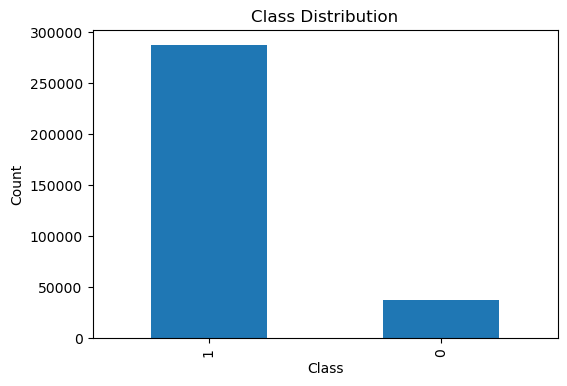

In [88]:
# Target Variable Class Distribution
class_counts = pd.Series(y_train).value_counts()

print(class_counts)

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [123]:
# Checking Imbalance Ratio
class_counts = pd.Series(y_train).value_counts()
imbalance_ratio = np.max(class_counts) / np.min(class_counts)
print("Imbalance ratio:", imbalance_ratio)


Imbalance ratio: 7.7809567592417315


In [104]:
# Random Oversampler
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Checking Oversample Distribution
class_counts = pd.Series(y_train_resampled).value_counts()
print(class_counts)


1    287732
0    287732
Name: loan_category, dtype: int64


**Model Training**

In [124]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [127]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\dell\anaconda3\lib\site-packages (0.10.1)



In [129]:
from imblearn.ensemble import BalancedRandomForestClassifier
# Model building (Balanced Random Forest Classifier)
rfc = BalancedRandomForestClassifier(random_state=32)

**Model Prediction**

In [130]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4, scoring='accuracy',verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Model Training with the best parameters
best_rfc = RandomForestClassifier(**best_params, random_state=32)
best_rfc.fit(X_train_resampled, y_train_resampled)

# Make prediction and classification report
y_pred = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the predicted probabilities
y_prob_positive = best_rfc.predict_proba(X_test)[:, 1]

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time= 2.9min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time= 2.9min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time= 2.9min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time= 5.8min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time= 6.1min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time= 6.1min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time= 6.0min
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=100; total time= 2.9min
[CV] END max_depth=N

[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=200; total time= 2.8min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=200; total time= 3.0min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=200; total time= 2.9min
[CV] END max_depth=5, max_features=log2, min_samples_split=5, n_estimators=200; total time= 2.9min
[CV] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END max_depth=5, max_features=log2, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] EN

In [131]:
y_test_series = pd.Series(y_test.reset_index(drop=True), name='y_test')
y_prob_series = pd.Series(y_prob_positive, name='y_prob_positive')
y_pred_series = pd.Series(y_pred, name='y_pred')

In [132]:
y_test_prob_df = pd.concat([y_test_series,y_prob_series,y_pred_series],axis=1).sort_values('y_prob_positive')

In [133]:
y_test_prob_df.describe()

,y_test,y_prob_positive,y_pred
count,139163.000000,139163.00000,139163.000000
mean,0.886500,0.85175,0.951769
std,0.317204,0.14887,0.214255
min,0.000000,0.06500,0.000000
25%,1.000000,0.81500,1.000000
50%,1.000000,0.90000,1.000000
75%,1.000000,0.95000,1.000000
max,1.000000,1.00000,1.000000


In [134]:
y_test_prob_df.head()

,y_test,y_prob_positive,y_pred
3277,0,0.065,0
54695,0,0.080,0
78513,0,0.085,0
75442,0,0.090,0
97346,0,0.095,0


In [135]:
y_test_prob_df.tail()

,y_test,y_prob_positive,y_pred
106629,1,1.0,1
100053,1,1.0,1
3353,1,1.0,1
132737,1,1.0,1
91756,1,1.0,1


**Model Evaluation**

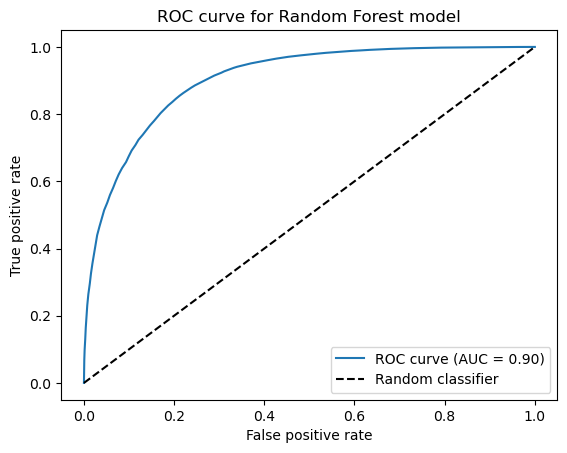

In [150]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

# Calculate Area under the ROC Curve
roc_auc = roc_auc_score(y_test, y_prob_positive)

# Plot
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest model')
plt.legend(loc='lower right')
plt.show()

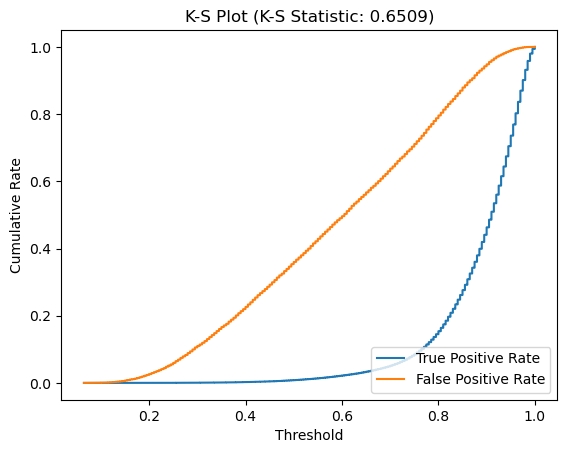

In [137]:
# Sort the predicted probabilities and the labels in ascending order
sorted_probs, sorted_labels = zip(*sorted(zip(y_prob_positive, y_test)))
sorted_labels = np.array(sorted_labels)

# cumulative sums of TPR and FPR
cumulative_tpr = np.cumsum(sorted_labels) / sum(y_test)
cumulative_fpr = np.cumsum(1 - sorted_labels) / (len(y_test) - sum(y_test))

# Calculate the K-S statistic
ks_statistic = np.max(np.abs(cumulative_tpr - cumulative_fpr))


plt.plot(sorted_probs, cumulative_tpr, label='True Positive Rate')
plt.plot(sorted_probs, cumulative_fpr, label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Cumulative Rate')
plt.title('K-S Plot (K-S Statistic: {:.4f})'.format(ks_statistic))
plt.legend(loc='lower right')
plt.show()


In [151]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob_positive)





In [156]:
# Print evaluation metrics
print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))
print('AUC Score: {:.4f}'.format(auc))
print('K-S Score : {:.4f}'.format(ks_statistic))

Accuracy: 0.9200
Precision: 0.9237
Recall: 0.9917
F1 Score: 0.9565
AUC Score: 0.9030
K-S Score : 0.6509


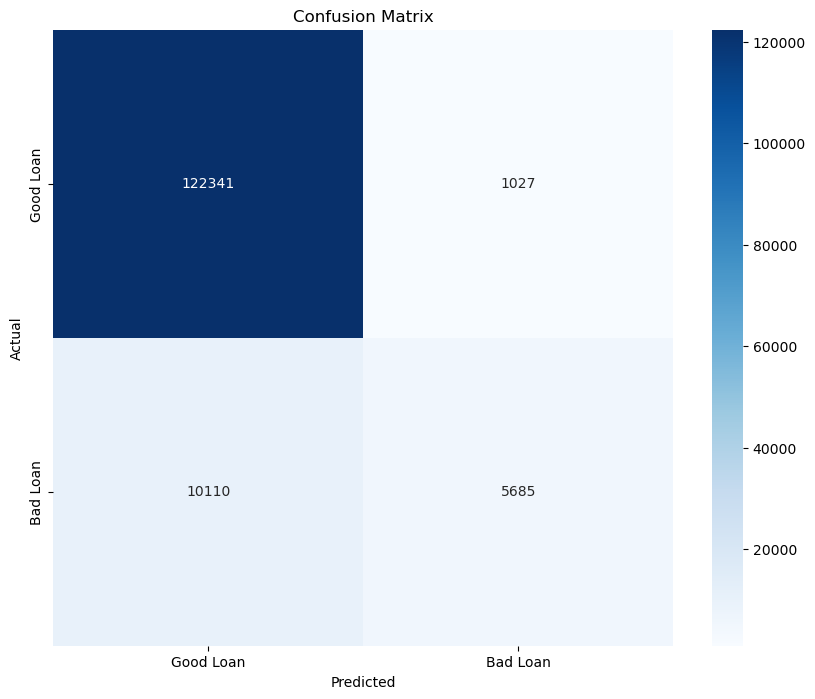

In [140]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Reverse the order of values in the confusion matrix
conf_matrix = np.flip(conf_matrix)

# Define class labels
class_labels = ['Good Loan', 'Bad Loan']  # Reverse the order to match the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [141]:
tp, fn, fp, tn = conf_matrix.ravel()

In [142]:
# Interpretation
print("Confusion Matrix Interpretation:")
print("Out of the {} total loans, the model predicted {} as good loans and {} as bad loans.".format(len(y_test), tp + fp, tn + fn))
print("Of the {} loans predicted as good, {} were good and {} were actually bad.".format(tp + fp, tp, fp))
print("Of the {} loans predicted as bad, {} were actually good and {} were bad.".format(tn + fn, fn, tn))

Confusion Matrix Interpretation:
Out of the 139163 total loans, the model predicted 132451 as good loans and 6712 as bad loans.
Of the 132451 loans predicted as good, 122341 were good and 10110 were actually bad.
Of the 6712 loans predicted as bad, 1027 were actually good and 5685 were bad.


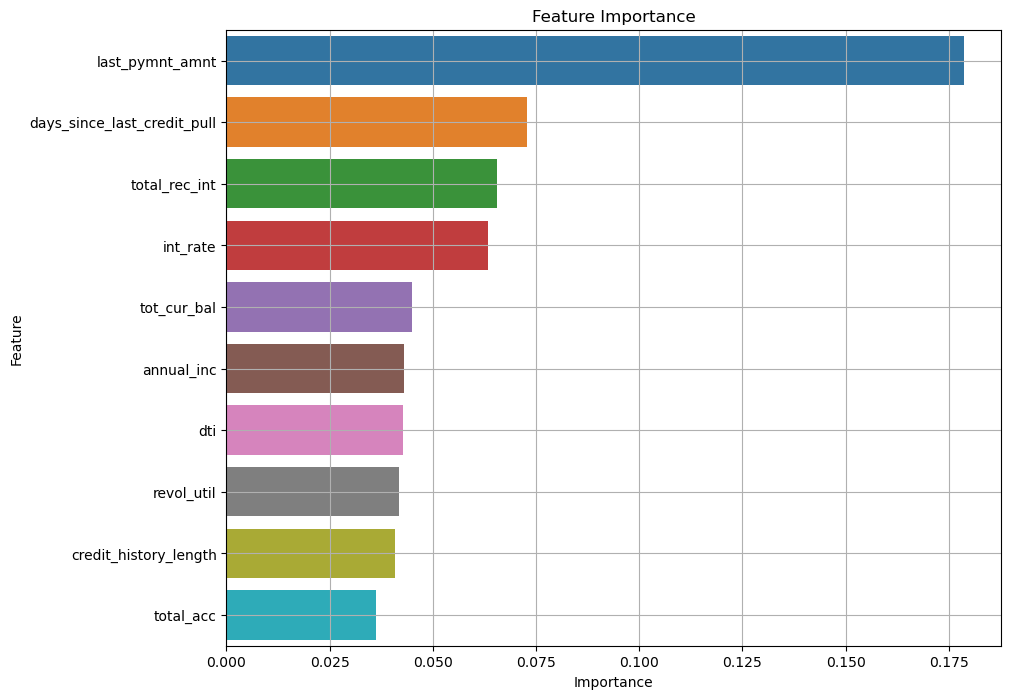

In [154]:
# Feature Importance from the model
feature_importance = best_rfc.feature_importances_

# Creating the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Value sorting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

### Saving Model

In [147]:
# Save the model to a file
model_file = "randomforestclassifier.pkl"
with open(model_file, 'wb') as f:
    pickle.dump(best_rfc, f)
print("Model saved as", model_file)

# Import the model from the file
with open(model_file, 'rb') as f:
    loaded_model = pickle.load(f)

Model saved as randomforestclassifier.pkl


In [145]:
best_rfc

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=32)

In [146]:
best_params

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 200}

## E) Summary

- The Model used to predict wheter or not a potential loan candidate is suitable used is a Balanced Random Forest Classifier Model which was tuned using a Grid Search to find the best hyperparameters. The Random Oversampling method is also used to deal with the class imbalance problem
- The Model performed considerably well on the testing set with more than 90% score for the evaluation metrics Accuracy, Precision, Recall, and F1, with an AUC score of **0.9030** and K-S score of **0.6509**
- There are still room of improvements to get better evaluation result for the models by adding more hyperparameters selection during hyperparameter tunings, trying other methods to handle the class imbalance, and also comparing Balanced Random Forest Classifier with other models for this problem
    